In [2]:
import astropy
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import photutils
import sys
# sys.path.append("../")
from util import show_imstat, plot_line, plot_zscale_image, overscan_subs_trim

import numpy as np

from astropy.visualization import ZScaleInterval
from astropy import stats as astrostats

import scipy
import scipy.stats as scistats

In [3]:
import ccdproc as ccdp
import astropy.units as u

In [11]:
from astropy.stats import sigma_clipped_stats
from photutils.detection import DAOStarFinder

In [4]:
zscale = ZScaleInterval()

# Work on NGC 6823
153	NGC6823		 1	I	7:20 X=1.10 <br>
154	NGC6823		 6	I	7:20 X=1.10<br>
155	NGC6823		 6	R	7:20 X=1.10<br>
156	NGC6823		 1	R	7:20 X=1.10<br>
157	NGC6823		 1	V	7:20 X=1.10 <br>
158	NGC6823		 6	V	7:20 X=1.10 <br>
159	NGC6823		 12	V	7:24 X=1.09 <br>
160-61	NGC6823		 12	B	7:24 X=1.09 <br>
162-63	NGC6823		 20	U	7:24 X=1.09 <br>

We only work on BVR bands

In [8]:
masterbias = ccdp.CCDData.read("../reduction/bias/masterbias.fits")
masterflatV = ccdp.CCDData.read("../reduction/flat/V_band/masterflatV_norm.fits")
masterflatB = ccdp.CCDData.read("../reduction/flat/B_band/masterflatB_norm.fits")
masterflatR = ccdp.CCDData.read("../reduction/flat/R_band/masterflatR_norm.fits")

In [6]:
file_template = "../reduction/a{num:0>3}_zt.fits"

In [10]:
# R
for i in range(2):
    num = i + 155
    file = file_template.format(num=num)
    ccd = ccdp.CCDData.read(file)
    ccd = ccdp.subtract_bias(ccd, masterbias)
    ccd = ccdp.flat_correct(ccd, masterflatR)
    ccd.write(f"../reduction/NGC6823/a{num:0>3}_f.fits", overwrite=True)

# V
for i in range(3):
    num = i + 157
    file = file_template.format(num=num)
    ccd = ccdp.CCDData.read(file)
    ccd = ccdp.subtract_bias(ccd, masterbias)
    ccd = ccdp.flat_correct(ccd, masterflatV)
    ccd.write(f"../reduction/NGC6823/a{num:0>3}_f.fits", overwrite=True)
    
# B
for i in range(2):
    num = i + 160
    file = file_template.format(num=num)
    ccd = ccdp.CCDData.read(file)
    ccd = ccdp.subtract_bias(ccd, masterbias)
    ccd = ccdp.flat_correct(ccd, masterflatB)
    ccd.write(f"../reduction/NGC6823/a{num:0>3}_f.fits", overwrite=True)

(7.722428253735875, 7.466817856913398, 7.2170528743844855)


id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,930.2759910941098,-0.00598244782933397,0.9617731317802759,-0.6923165946087834,-0.8847600200822403,25,0.0,375.7672767738416,7.177102011562811,-2.139872797775289
2,1284.9630015424739,5.477840284090143,0.2993210942051598,-0.3398788260034779,0.3408886348267192,25,0.0,58.39455505488951,1.046978420239562,-0.04984432581252278
3,1127.7432093892992,8.036546556590585,0.5705342134309038,-0.9189663236671668,-0.628898242162481,25,0.0,75.2352884139596,1.2820130353963344,-0.2697311026838219
4,48.90304227736331,14.020249970552564,0.24312511840833337,0.1627724757156023,-0.43634534034167577,25,0.0,4.2090590380193,1.09523683778781,-0.09877010666736799
5,1064.5927309866597,18.76894775602947,0.540505452545627,0.6223410804537349,-0.31885365617382255,25,0.0,63.93282994233485,1.3265703233938022,-0.3068256937535593
6,1657.7391788045936,30.43817819724541,0.25769368585156943,0.21888090784890643,-0.5028726154021265,25,0.0,4.858413311237612,1.0294141270677128,-0.031475309886052766
7,167.34883179914817,36.8849951798063,0.46478792706501204,-0.4488723389116512,-0.9284374316497142,25,0.0,792.6952402831128,11.03207887337356,-2.6066433953715444
8,426.6103099846244,37.10901491766723,0.3063186195882419,0.2198762630009021,-0.0912285276477842,25,0.0,38.73406126073388,1.2570718147058935,-0.2484002225354759
9,846.6416682053663,39.08621469408647,0.7013124810428596,0.31820224638746036,-0.5342031717942844,25,0.0,102.47908877214199,1.5030020218501576,-0.44239891200914677


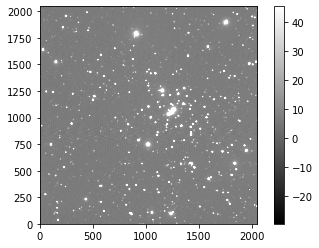

In [25]:
ccddata = ccdp.CCDData.read(f"../reduction/NGC6823/a157_f.fits")

plt.figure()
plot_zscale_image(ccddata, plt.gca(), 'gray')

mean, median, std = sigma_clipped_stats(ccddata, sigma=3.0)  
print((mean, median, std))  

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources_V = daofind(ccddata - median)  

sources_V

(38.99597856826526, 38.59070054035168, 9.94659216212103)


id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1,1281.5429485985183,5.862990106002496,0.5458531534622747,-0.4438999385341699,-0.8032177581950884,25,0.0,524.2046656704797,4.569099344686306,-1.649576502263372
2,1124.9087058035582,6.7834925937053345,0.6298531445968555,-0.34838820047246033,-0.7064130514079984,25,0.0,217.2491491681466,1.9848952184404893,-0.7443439638256688
3,258.9509033688806,8.956378334754824,0.38603931372201,-0.9194482769392405,-0.6398730063938669,25,0.0,118.4942925469397,1.7324350373048647,-0.5966423961331558
4,1062.5467837822207,17.44612804106087,0.4240520349680757,-0.9481027833187068,-0.7944725589954671,25,0.0,169.77951720014528,2.0782553714555934,-0.7942472791305583
5,1837.8075722538815,21.81854544732111,0.5310473604730293,-0.6629624255841334,-0.8762044706152601,25,0.0,257.23443664991356,2.6184554569451985,-1.045112976081211
6,1355.9125163054327,25.69315019596257,0.3623937207814804,-0.9292971838275494,-0.9905803061804442,25,0.0,246.98790889172238,2.172393625719294,-0.8423462995173213
7,165.24463519262346,35.66784564863623,0.4840226009772892,-0.7480629639103054,-0.7630311229772736,25,0.0,2949.04693257323,28.922343788332768,-3.65308371024009
8,425.0264057126273,36.14450330143321,0.6332841374599975,-0.5799065553667544,-0.9124037268621968,25,0.0,110.92446902050258,1.1718757607668975,-0.17220392836595
9,845.1600145194898,38.04101436062616,0.538452105180183,-0.7132275379596434,-0.8380463004376718,25,0.0,320.49333682239717,3.232987904546765,-1.2740101995134072


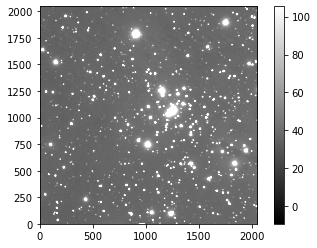

In [26]:
ccddata = ccdp.CCDData.read(f"../reduction/NGC6823/a160_f.fits")

plt.figure()
plot_zscale_image(ccddata, plt.gca(), 'gray')

mean, median, std = sigma_clipped_stats(ccddata, sigma=3.0)  
print((mean, median, std))  

daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)  
sources_B = daofind(ccddata - median)  

sources_B

In [51]:
sources_B[np.argsort(sources_B['flux'])[::-1]][:10]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
902,900.1840181098223,1805.9768072277925,0.224378282207185,0.20448929614513575,0.9015533565196157,25,0.0,64378.08319283184,1197.4004151538022,-7.695598510962645
555,1254.742887959902,1084.5605537634935,0.2684630183832277,-0.09522243550897984,0.3549867343377957,25,0.0,63574.25410540798,1071.8096240229934,-7.575294130885689
680,1143.4984884952237,1260.0708270328073,0.25133250065351237,-0.2395544214031339,0.06282099108203841,25,0.0,63871.60958674439,775.9605932518647,-7.224599166006865
351,1010.5205279520654,751.9618504995032,0.28816732777391135,0.04146808587851118,0.027954425596410534,25,0.0,63567.30540939326,759.8592689904536,-7.201832913727225
881,900.2593915720075,1780.555488878596,0.6022634758038915,0.33532789363608334,0.20508388546868722,25,0.0,64248.112955219214,644.0791443892234,-7.022348091767599
265,1825.2885338103586,569.6609200803116,0.43801299787053843,-0.4625451282167043,-0.7710820262278287,25,0.0,65060.29219775862,591.7653186789285,-6.930373772677787
890,901.920147721041,1793.2520036990736,0.6318047757730868,0.09845214889405834,0.7456466937394194,25,0.0,64888.6929855974,584.6292556142631,-6.917201360575835
28,1226.3540431638842,96.08114152174423,0.3487391774359812,-0.10118149571534353,-0.6376887600447356,25,0.0,64428.75350434134,567.7332629818424,-6.885360849735941
262,1826.9737083714094,569.3792819163666,0.42520933899430735,-0.6753014838290516,-0.6564310559168248,25,0.0,64976.269445188394,563.5148250188175,-6.877263365015537


In [52]:
sources_V[np.argsort(sources_V['flux'])[::-1]][:10]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
786,902.040371172785,1787.9331969079333,0.3484936877571171,-0.2571029514562225,-0.8033741983658405,25,0.0,64391.5908952051,881.3492021859086,-7.362870039288548
828,1742.7162703045158,1894.7725304004723,0.5411841665213296,-0.15938319934904843,-0.9924163116671734,25,0.0,46489.93027362805,621.8703890356746,-6.9842496948776205
825,1741.4455274536012,1894.6134662417176,0.4888953793034539,0.3601546306726874,-0.8122585070890292,25,0.0,41479.94674968098,560.1580033313296,-6.870776363480758
30,1228.660694383531,97.0933615011388,0.48084229348599256,-0.7188771949432877,-0.9955372046538065,25,0.0,18256.825357655704,255.12470719634067,-6.016881298224217
186,1828.303698956683,570.8618838673303,0.5868111054477035,-0.848180548718081,-0.8305257522582202,25,0.0,14796.551868775854,214.9451494164082,-5.830819122522342
676,148.5508672162024,1522.7804184418806,0.4624129010168983,-0.7763733215324375,-0.8333229360540987,25,0.0,14530.255539790496,202.09400419201128,-5.7638835721980675
185,1827.2368612619969,571.033510294107,0.6310243889317895,-0.4110303853026479,-0.9719499741831418,25,0.0,13421.669558484318,177.24313866526813,-5.621423580053998
220,1936.4803930496905,690.705472562684,0.5390640953578661,-0.8301059560021197,-0.9811517161782737,25,0.0,11032.90076928418,157.74079353819351,-5.494860053193948
455,1245.2021313412317,1045.337753476191,0.6161962925389741,0.39030893953148105,-0.7839358446277755,25,0.0,10429.886935006341,141.31983537397812,-5.375507807114094


Has to either cross match x, y centroid for each object in different filters or
Use the first source tables in V band to construct aperture photometry to extract flux for  other bands, B and R

# Task 2

Some information we have about WIRO. 
$$D=2.3 m, f/3.5$$
From the question, $f_1=345$ mm, $f_2=120$ mm. 13.5 micron pixel CD. Transmission VPH grating $300$ lines/mm, used in first order, $m=1$


Focal length for main mirror
$$F = 3.5 * D = 2.3 * 3.5 = 8.05\ m = 8050\ mm$$
plate scale 
$$a = \frac{1}{F} = \frac{1}{8050}\ rad/mm = \frac{206265}{8050}\ ''/mm = 25.62\ ''/mm$$
For the projected size of a 100 micron fiber
$$
\begin{align*}
\frac{w'}{w} &= \frac{f_2}{f_1} \\
w' &= w \frac{f_2}{f_1} \\
&= 100 *  \frac{120}{345} \\
&= 34.78\ \mu m \\
& = \frac{34.78}{13.5}\ pix = 2.576\ pix
\end{align*}
$$

## For reciprocal dispersion
The grating equation for a transmission grating is
$$m\lambda = d(\sin \beta - \sin \alpha)$$
In the VPH grating $\alpha=-\beta$ 
$$\beta = \sin^{-1}\frac{m\lambda}{2d} = \sin^{-1}\frac{370*10^{-6}}{2*(1/300)} = 3.181^\circ$$
$$
\begin{align}
recp\ disp. &= \frac{d\lambda}{d\ell} = \frac{1}{f_2 A} = \frac{d \cos\beta}{f_2 m} =  \frac{d \cos \left(\sin^{-1}\frac{m\lambda}{2d}\right)}{f_2 m}\\
&= \frac{1/300 * \cos(3.181)}{120 * 1} \\
&= 2.7735 \times 10^{-5}\ mm/mm \\
&= 277.349\ A/mm
\end{align}
$$
For $\lambda=600\ nm$
$$recp\ disp. = \frac{d \cos \left(\sin^{-1}\frac{m\lambda}{2d}\right)}{f_2 m} = \frac{1/300 * \cos\left(\sin^{-1}\frac{600*10^{-6}}{2*(1/300)}\right)}{120 * 1} = 2.766\times 10^{-5} mm/mm = 276.65\ A/mm$$

## For incidence angle 
Since we are using VPH grating, 
$$\alpha = -\beta$$
The incidence angle is then 
$$\alpha=-3.181^{\circ}$$
Minus sign means the incidence and diffracted ray are on the same side of the grating normal

## For spectral resolution
$$
\begin{align}
R &= \frac{\lambda}{\Delta \lambda} = \frac{\lambda}{\frac{d\lambda}{d\ell}w'} = \frac{\lambda}{w'/(f_2 A)} = \frac{\lambda f_2 A}{w'}\\
&=  \frac{\lambda f_2 m}{w'd \cos \beta} \\
&=  \frac{370\times 10^{-6} * 120 * 1 }{34.78*10^{-3}*(1/300)*\cos 3.181} \\
&= 383.3755
\end{align}
$$


## Use 30 l/mm VPH with $m=40$
$$\beta = \sin^{-1}\frac{m\lambda}{2d} = \sin^{-1}\frac{40 * 370*10^{-6}}{2*(1/30)} = 12.827^\circ$$
$$R = \frac{\lambda f_2 m}{w'd \cos \beta} = \frac{370\times 10^{-6} * 120 * 40 }{34.78*10^{-3}*(1/30)*\cos 12.827} = 1572.125$$
$$recp\ disp. =  \frac{d \cos (\beta)}{f_2 m} =  \frac{1/30 * \cos(12.827)}{120 * 40} = 6.771\times 10^{-6}\ mm/mm = 67.712\ A/mm$$
Free spectral range (wavelength coverage) is 
$$FSR = \frac{\lambda}{m} = \frac{370}{40} = 9.25\ nm = 92.5\ A$$
Very small

In [73]:
1/30 * np.cos(np.arcsin(40*370e-6/(2*1/30))) / (120*40) *1e7

67.7115739965216

In [69]:
np.arcsin(370e-6*40/(2*(1/30))) * 180/np.pi

12.82652982584218

In [70]:
370e-6*120*40/(34.78e-3*(1/30)*np.cos(12.82652982584218 * 180/np.pi))

1572.124687500301

In [75]:
370/40

9.25